## Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility

In [ ]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' 
#plt.style.use('fivethirtyeight')

# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('/coinmarketcap_06122017.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]

# Counting the number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

## Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [ ]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

## How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

Text(0, 0.5, '% of total cap')

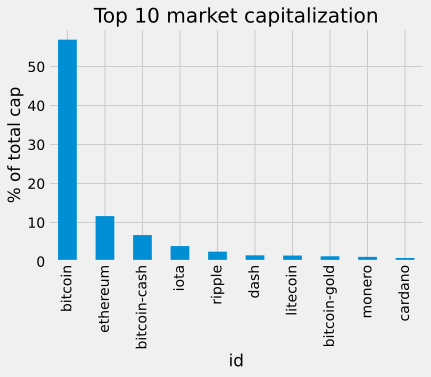

In [ ]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap[:10].set_index('id')

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

# Plotting the barplot with the title defined above 
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE)

# Annotating the y axis with the label defined above
ax.set_ylabel(TOP_CAP_YLABEL)


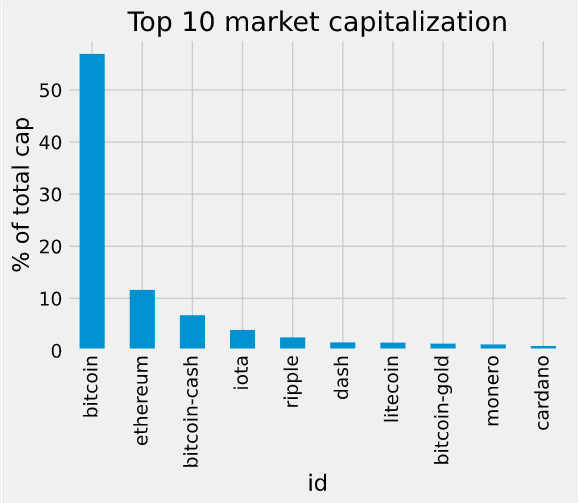

## Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a></sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p></sup></em></p>

Text(0.5, 0, '')

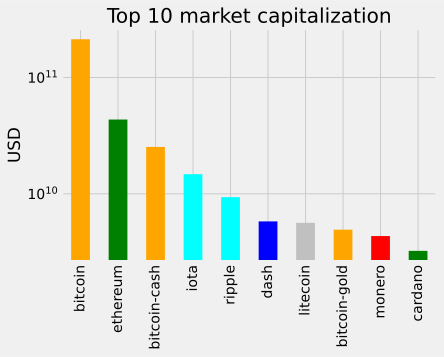

In [ ]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.market_cap_usd.plot.bar(title=TOP_CAP_TITLE, logy=True, color = COLORS)

# Annotating the y axis with 'USD'
ax.set_ylabel('USD')

# Final touch! Removing the xlabel as it is not very informative
ax.set_xlabel('')

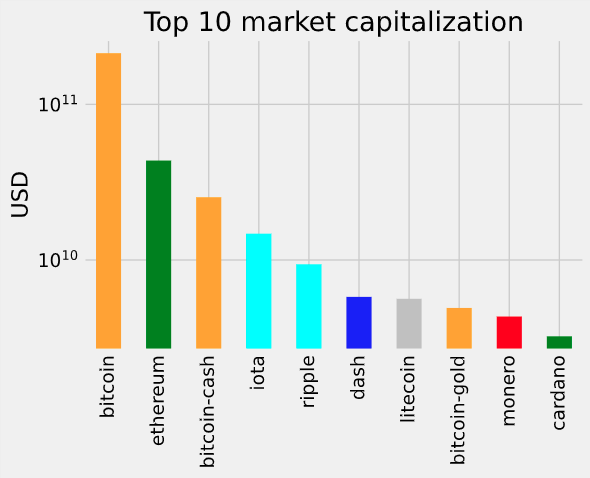

## What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [ ]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility =  volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


## Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

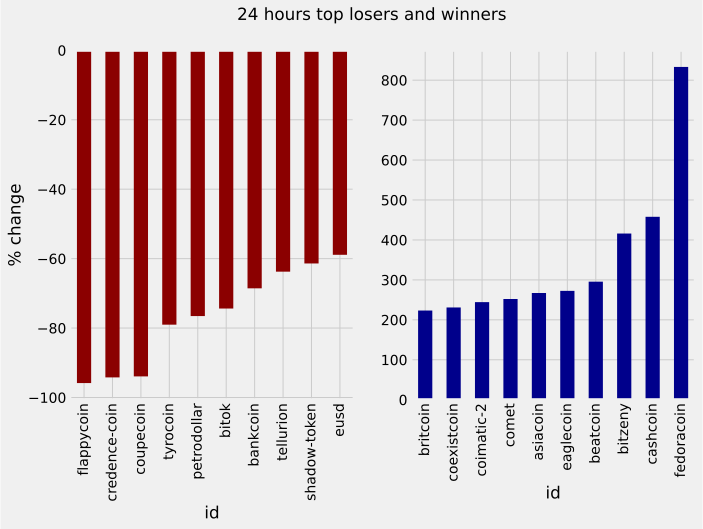

In [ ]:
# Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    
    # Setting the main title to TITLE
    fig.suptitle(title)
    
    # Setting the ylabel to "% change"
    ax.set_ylabel('% change')
    
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

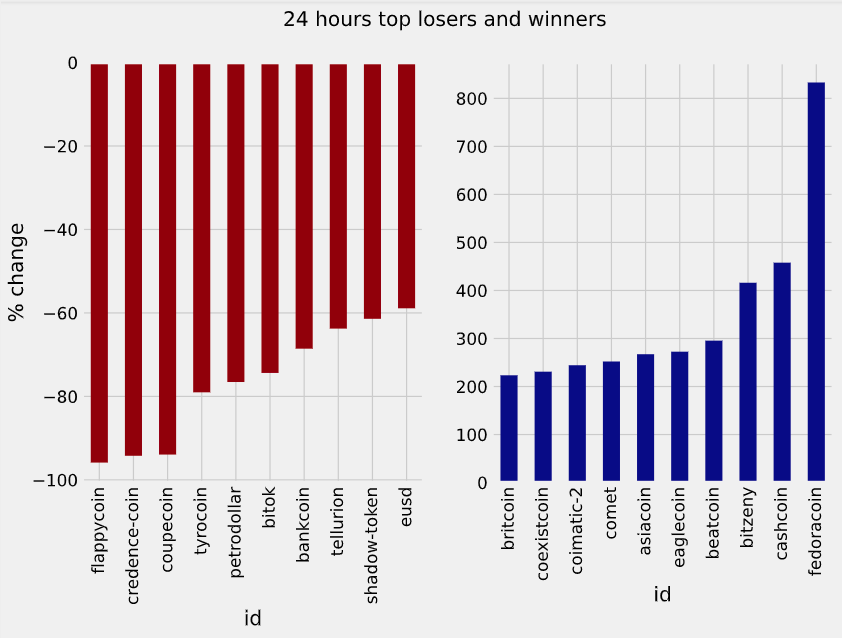

## Ok, those are... interesting. Let's check the weekly Series too.
<p>800% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

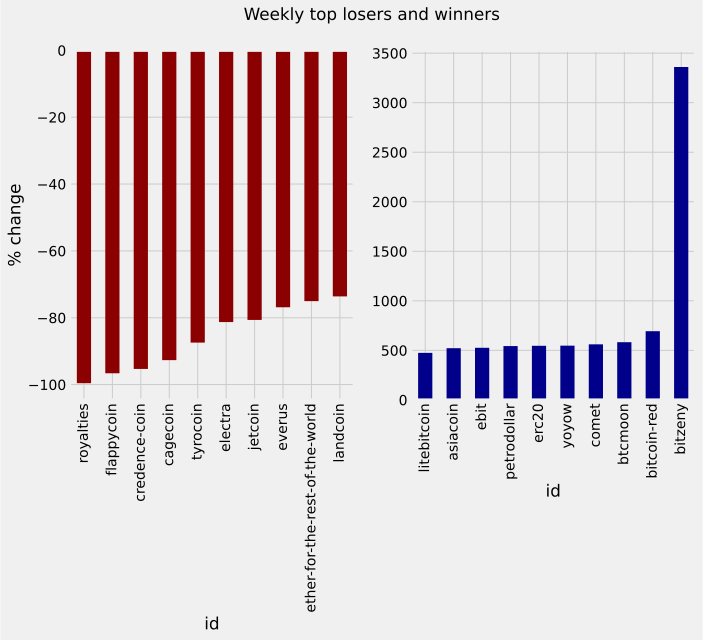

In [ ]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d')

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

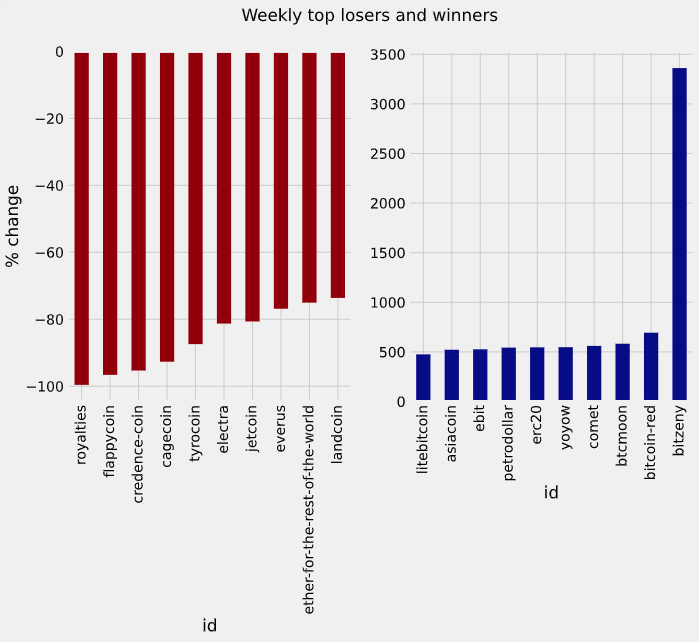

## How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [ ]:
# Selecting everything bigger than 10 billion 
largecaps = cap[cap['market_cap_usd']>10000000000]

# Printing out largecaps
print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


## Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>
<p><em>This is all for now. Thanks for completing this project!</em></p>

<BarContainer object of 3 artists>

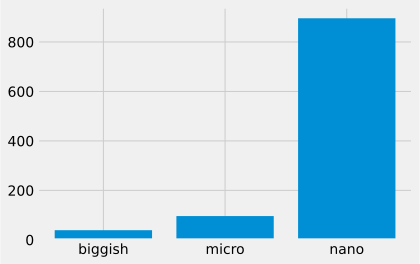

In [ ]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount("market_cap_usd > 3E+8")

# Same as above for micro ...
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# ... and for nano
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
plt.bar(range(len(values)), values, tick_label=LABELS)

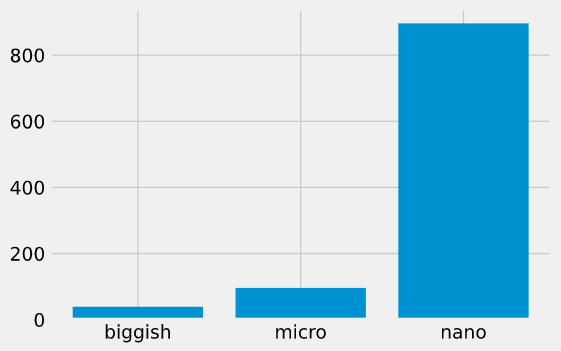